In [128]:
from temporal_random_walk import LinearRandomPicker, ExponentialRandomPicker, UniformRandomPicker

In [149]:
N_TRIALS = 100_000
HI = 20

In [150]:
def test_pickers(picker, prioritize_end, hi, n_trials=N_TRIALS):
    counts = [0] * hi
    
    for _ in range(n_trials):
        picked_num = picker.pick_random(0, hi, prioritize_end)
        counts[picked_num] += 1
    
    return counts

In [151]:
import matplotlib.pyplot as plt

def plot_number_picked(counts):
    plt.plot(counts)
    
    plt.xlabel('Number')
    plt.ylabel('Times Picked')
    
    plt.show()

In [152]:
counts_linear_end_prioritized = test_pickers(LinearRandomPicker(), True, hi=HI)

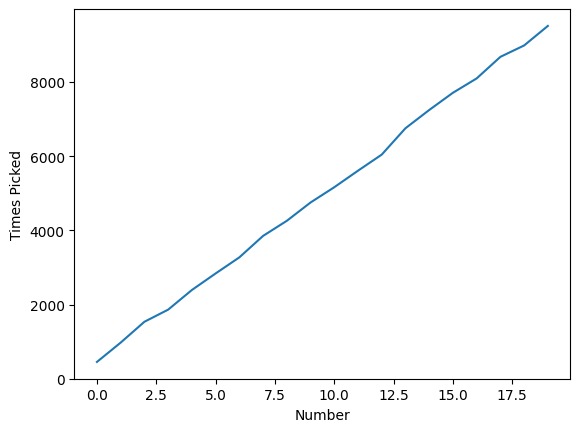

In [153]:
plot_number_picked(counts_linear_end_prioritized)

In [154]:
counts_linear_start_prioritized = test_pickers(LinearRandomPicker(), False, hi=HI)

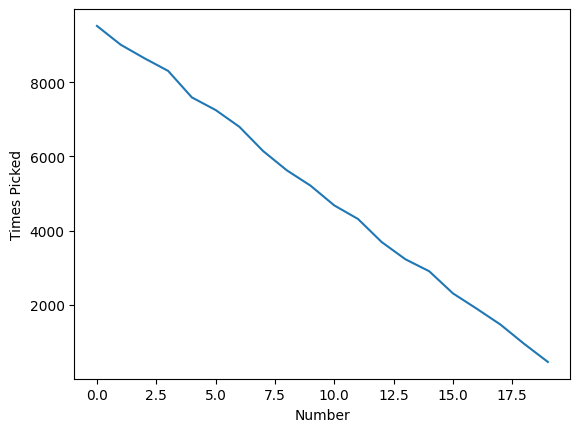

In [155]:
plot_number_picked(counts_linear_start_prioritized)

In [156]:
import numpy as np

class PyExponentialRandomPicker:
    def __init__(self, decay_rate=1.0):
        self.decay_rate = decay_rate

    def pick_random(self, start, end, prioritize_end=True):
        if start >= end:
            raise ValueError("Start must be less than end.")
        
        length = end - start
        indices = np.arange(length)
    
        if prioritize_end:
            weights = np.exp(self.decay_rate * indices)
        else:
            weights = np.exp(-self.decay_rate * indices)
    
        probabilities = weights / weights.sum()
        random_index = np.random.choice(indices, p=probabilities)
    
        return start + random_index

In [157]:
counts_exp_end_prioritized = test_pickers(ExponentialRandomPicker(), True, hi=HI)

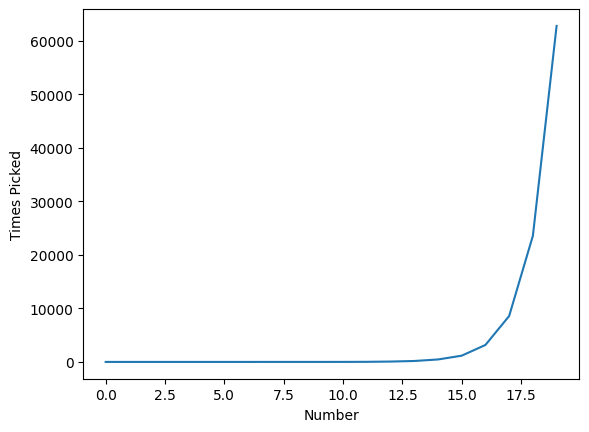

In [158]:
plot_number_picked(counts_exp_end_prioritized)

In [159]:
counts_exp_py_end_prioritized = test_pickers(PyExponentialRandomPicker(), True, hi=HI)

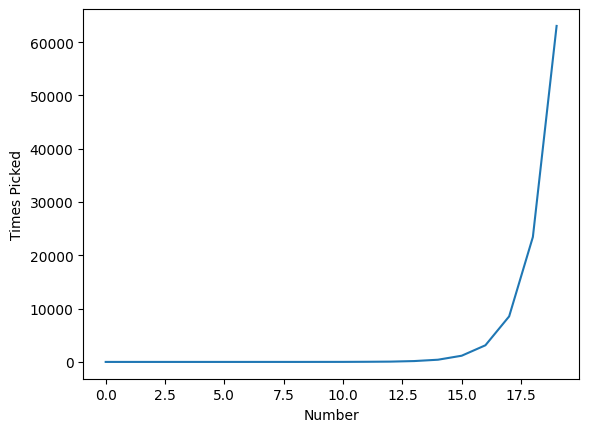

In [160]:
plot_number_picked(counts_exp_py_end_prioritized)

In [161]:
counts_exp_start_prioritized = test_pickers(ExponentialRandomPicker(), False, hi=HI)

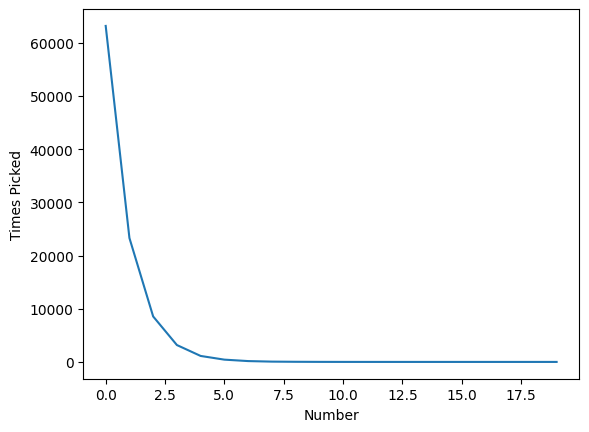

In [162]:
plot_number_picked(counts_exp_start_prioritized)

In [163]:
counts_exp_py_start_prioritized = test_pickers(PyExponentialRandomPicker(), False, hi=HI)

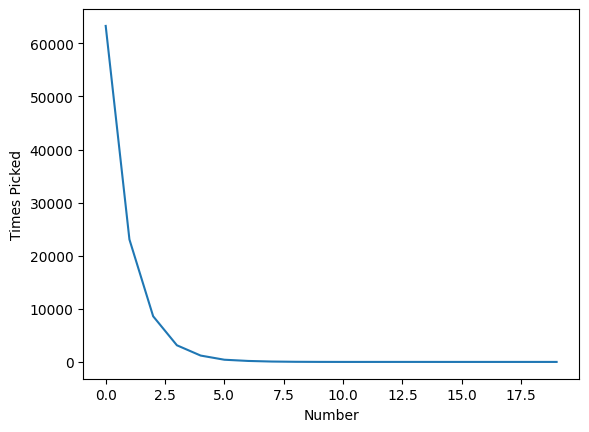

In [164]:
plot_number_picked(counts_exp_py_start_prioritized)

In [165]:
counts_uniform_end_prioritized = test_pickers(UniformRandomPicker(), True, hi=HI)

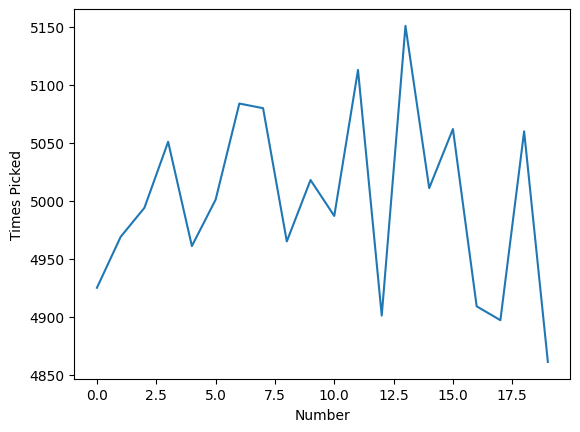

In [166]:
plot_number_picked(counts_uniform_end_prioritized)

In [167]:
counts_uniform_start_prioritized = test_pickers(UniformRandomPicker(), False, hi=HI)

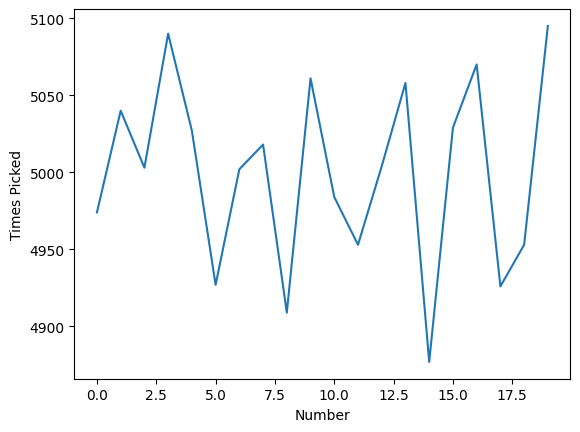

In [168]:
plot_number_picked(counts_uniform_start_prioritized)